<div
    style='background-image: url("images/_banner_.jpg"); padding: 0px;
    background-size: cover; border-radius: 10px; height: 250px;
    background-position: 50% 50%'>
    <div
        style="float: left; margin: 20px; padding: 10px;
        background: rgba(255 , 255 , 255 , 0.8); width: 40%; height: 100px;
        border-radius: 10px">
        <div
            style="position: relative; top: 50%;
            transform: translatey(-50%)">
            <div
                style="font-size: xx-large; font-weight: 900;
                color: rgba(0 , 0 , 0 , 0.9);
                line-height: 100%">Python Workshop
            </div>
            <div
                style="font-size: large; padding-top: 20px;
                color: rgba(0 , 0 , 0 , 0.7)">Files Input Output (IO)
            </div>
        </div>
    </div>
    <div style="float: right; font-size: small;
        position: relative; top: 90%; padding: 5px;
        background: rgba(255 , 255 , 255 , 0.6); border-top-left-radius: 10px;
        color: rgba(0 , 0 , 0 , 1)">Shahar Shani-Kadmiel, CiTG, TU Delft
    </div>
</div>

## Reading and Writing Files

From the python documentation:

[open()](https://docs.python.org/3.6/library/functions.html#open) returns a [file object](https://docs.python.org/3.6/glossary.html#term-file-object), and is most commonly used with two arguments: `open(filename, mode)`.

* `filename` is a string containing the filename relative or absolute path.
* `mode` is another string containing a few characters describing the way in which the file will be used. 

accepted modes are:

| mode | description |
|------|-------------|
| 'r'  | read-only (default mode if not specified) |
| 'w'  | write-only (an existing file with the same name will be erased) |
| 'a'  | append (cursor is placed at the end of the file) |

A `'+'` added to any of the above will add the opposite functionality:

| mode | description |
|------|-------------|
| 'r+'  | read & write |
| 'w+'  | write & read (an existing file with the same name will be erased) |
| 'a+'  | append & read (cursor is placed at the end of the file) |

Add a `'b'` to open file in binary mode.

### Reading

Let's have a look at a sample file:

In [1]:
# open the file in read-only mode
f = open('data/berkeley.sw4', 'r')

# report where the cursor is
print(f.tell())

# read a line from the file, assign content to var. ``line`` and print
line = f.readline()
print(line)

# report where the cursor is
print(f.tell())

# why is it there?
print(len(line))

0
fileio path=./results pfs=1 verbose=2 printcycle=1.  # this line must be #1

76
76


Execute the next cell over and over a few times. See what happens...

In [2]:
print(f.readline())
print(f.tell())



77


This can be implemented in a loop:

In [3]:
for line in f:
    print(line)

# grid size is set in the grid command

# DO NOT CHANGE AZ!

grid x=12e3 y=11e3 z=5e3 h=20.0 lat=37.93 lon=-122.25 az=143.6380001671 proj=tmerc datum=NAD83 lon_p=-123.0 lat_p=35.0 scale=0.9996



# curvilinear grid extends to z=6000 and gets approximately the same

# gridsize as the finest Cartesian

topography input=rfile zmax=2e3 order=3 file=./berkeley.rfile



time t=90



# Verison 8.3 of USGS model in rfile format

# CHECK PATH TO RFILE

rfile filename=berkeley.rfile directory=./



# threshold on vp and vs

globalmaterial vsmin=500 vpmin=768



# simple source (irrelevant for this test)

source x=2.5e3 y=3.8e3 depth=3.5e3 strike=142.1 rake=180 dip=95.6 m0=1.7162e+17 t0=2 freq=7.62985 type=Liu



# images

# topography (can't be written without the topography command enabled)

image mode=topo     z=0.0   cycle=0        file=berkeley



image mode=lat      z=0.0   cycle=0        file=berkeley

image mode=lon      z=0.0   cycle=0        file=berkeley



# Output images of the elast

### Writing

The contents of the variable ``line`` should be:

```sh
'rec x=12000 y=11000 depth=0 file=surface_x=12000_y=11000_z=0_ writeEvery=100 nsew=0 variables=velocity\n'
```

Let's open a new file and write this line:

In [4]:
# open a file in write-only mode
out_f = open('temp.txt', 'w')

# Where is the cursor?
print(out_f.tell())

print(out_f.write(line))
print(out_f.tell())

0
103
103


Notice that a new file was created. Open it in a text editor, does it contain the line we just wrote to it?

Note that when writing to a file, everything is actually written to a buffer and is offloaded to the actual file when it is closed. To force everything currently in the buffer to be written (*saved*) to the file try the `flush` method.

In [5]:
# Write another two lines to the file and view it in your text editor
out_f.write('This is another line')
out_f.write('Is this another line??')

# uncomment the following line to force save to file
# out_f.flush()

22

So did we get what we expected? Try adding `'\n'`, the line end character to the end of the above strings and execute the cell again.

### The `with` block

Files remain open until you explicitly close them. This can lead to unwanted effects. It is therefor recommended to handle files within a `with` block:

In [6]:
with open('data/berkeley.sw4') as in_f, open('temp.txt', 'a') as out_f:
    for line in in_f:
        out_f.write(line)

print(in_f.closed)
print(out_f.closed)

True
True


## Parsing file contents

Reading the contents of a file is pretty useless unless we are able to extract some information from within the contents. This is where [string operations](https://docs.python.org/3.6/library/string.html) and [string methods](https://docs.python.org/3.6/library/stdtypes.html#string-methods) come in handy.

Our `line` variable should still be:

```sh
'rec x=12000 y=11000 depth=0 file=surface_x=12000_y=11000_z=0_ writeEvery=100 nsew=0 variables=velocity\n'
```

How would we parse the above string into a useful data structure?

Have a look for example at [`str.split`](https://docs.python.org/3.6/library/stdtypes.html#str.split), [`str.strip`](https://docs.python.org/3.6/library/stdtypes.html#str.strip), and other string methods.

In [7]:
print(line.split())

['rec', 'x=12000', 'y=11000', 'depth=0', 'file=surface_x=12000_y=11000_z=0_', 'writeEvery=100', 'nsew=0', 'variables=velocity']


### Exercise

Write a `line_parser` function that takes a `line` and returns its content in a usable data structure. A [dictionary](https://docs.python.org/3.6/library/stdtypes.html#dictionary-view-objects) is a good place to start.

In [8]:
line = 'rec x=12000 y=11000 depth=0 file=surface_x=12000_y=11000_z=0_ writeEvery=100 nsew=0 variables=velocity\n'

def line_parser(line):
    line = line.split()
    name = line.pop(0)
    contents = {}
    
    # your code here: (approx 6 lines)
    for item in line:
        key, value = item.split('=', 1)
        try:
            value = float(value)
        except ValueError:
            pass

        contents[key] = value
    # end your code
    return name, contents

line_parser(line)

('rec',
 {'x': 12000.0,
  'y': 11000.0,
  'depth': 0.0,
  'file': 'surface_x=12000_y=11000_z=0_',
  'writeEvery': 100.0,
  'nsew': 0.0,
  'variables': 'velocity'})

Now write a `file_parser` function that takes a `filename` and parses it into a dictionary object. The `line_parser` we wrote will not handle lines with *comments*, make sure to filter those out before *shipping* them off to the `line_parser`.

In [9]:
def file_parser(filename, comment='#'):
    file_contents = {}
    with open(filename) as f:
        
        # your code here: (approx 8 lines)
        for line in f:
            line = line.split(comment)[0].strip()
            if not line:
                continue

            name, contents = line_parser(line)

            try:
                file_contents[name].append(contents)
            except KeyError:
                file_contents[name] = [contents]
        # end your code
    return file_contents

file_parser('data/berkeley.sw4')

{'fileio': [{'path': './results',
   'pfs': 1.0,
   'verbose': 2.0,
   'printcycle': 1.0}],
 'grid': [{'x': 12000.0,
   'y': 11000.0,
   'z': 5000.0,
   'h': 20.0,
   'lat': 37.93,
   'lon': -122.25,
   'az': 143.6380001671,
   'proj': 'tmerc',
   'datum': 'NAD83',
   'lon_p': -123.0,
   'lat_p': 35.0,
   'scale': 0.9996}],
 'topography': [{'input': 'rfile',
   'zmax': 2000.0,
   'order': 3.0,
   'file': './berkeley.rfile'}],
 'time': [{'t': 90.0}],
 'rfile': [{'filename': 'berkeley.rfile', 'directory': './'}],
 'globalmaterial': [{'vsmin': 500.0, 'vpmin': 768.0}],
 'source': [{'x': 2500.0,
   'y': 3800.0,
   'depth': 3500.0,
   'strike': 142.1,
   'rake': 180.0,
   'dip': 95.6,
   'm0': 1.7162e+17,
   't0': 2.0,
   'freq': 7.62985,
   'type': 'Liu'}],
 'image': [{'mode': 'topo', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'lat', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'lon', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'rho', 'z': 0.0, 'cycle': 0

In [10]:
input_file = file_parser('data/berkeley.sw4')
input_file

{'fileio': [{'path': './results',
   'pfs': 1.0,
   'verbose': 2.0,
   'printcycle': 1.0}],
 'grid': [{'x': 12000.0,
   'y': 11000.0,
   'z': 5000.0,
   'h': 20.0,
   'lat': 37.93,
   'lon': -122.25,
   'az': 143.6380001671,
   'proj': 'tmerc',
   'datum': 'NAD83',
   'lon_p': -123.0,
   'lat_p': 35.0,
   'scale': 0.9996}],
 'topography': [{'input': 'rfile',
   'zmax': 2000.0,
   'order': 3.0,
   'file': './berkeley.rfile'}],
 'time': [{'t': 90.0}],
 'rfile': [{'filename': 'berkeley.rfile', 'directory': './'}],
 'globalmaterial': [{'vsmin': 500.0, 'vpmin': 768.0}],
 'source': [{'x': 2500.0,
   'y': 3800.0,
   'depth': 3500.0,
   'strike': 142.1,
   'rake': 180.0,
   'dip': 95.6,
   'm0': 1.7162e+17,
   't0': 2.0,
   'freq': 7.62985,
   'type': 'Liu'}],
 'image': [{'mode': 'topo', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'lat', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'lon', 'z': 0.0, 'cycle': 0.0, 'file': 'berkeley'},
  {'mode': 'rho', 'z': 0.0, 'cycle': 0

### Reading column data

Most times, you will want to read columns of data from a tabulated file. NumPy has built-in functions for that. The most basic of which is [numpy.loadtxt](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html)

In [11]:
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np
(time, F_x, F_y, F_z,
 D_x1, D_x2, D_y1, D_y2, D_z1, D_z2,
 Chan7, Chan8) = np.loadtxt('data/SURE_GI_JettedBlock_20171027_135204.txt',
                            skiprows=28).T

D_x = 0.5 * (D_x1 + D_x2)
D_y = 0.5 * (D_y1 + D_y2)
D_z = 0.5 * (D_z1 + D_z2)

<IPython.core.display.Javascript object>


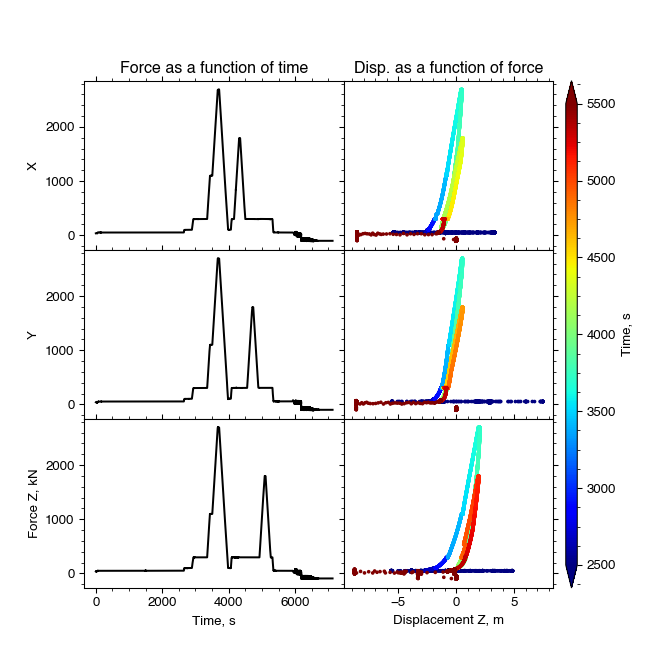

Text(0.5,1,'Disp. as a function of force')

In [12]:
fig, ((ax1, ax11),
      (ax2, ax22),
      (ax3, ax33)) = plt.subplots(3, 2, sharex='col', sharey=True,
                                    figsize=(7, 7))

fig.subplots_adjust(wspace=0, hspace=0)

ax1.plot(time, F_x, 'k')
ax1.set_ylabel('X')

ax2.plot(time, F_y, 'k')
ax2.set_ylabel('Y')

ax3.plot(time, F_z, 'k')

ax3.set_ylabel('Force Z, kN')
ax3.set_xlabel('Time, s')

sc = ax11.scatter(D_x, F_x, 3, c=time, vmin=2500, vmax=5500, cmap='jet')
sc = ax22.scatter(D_y, F_y, 3, c=time, vmin=2500, vmax=5500, cmap='jet')
sc = ax33.scatter(D_z, F_z, 3, c=time, vmin=2500, vmax=5500, cmap='jet')

ax33.set_xlabel("Displacement Z, m")
plt.colorbar(sc, ax=(ax11, ax22, ax33), aspect=40, extend='both', label='Time, s')

ax1.set_title('Force as a function of time')
ax11.set_title('Disp. as a function of force')